<a href="https://colab.research.google.com/github/mmousavi2/PUS2024_MMousavi/blob/main/HW3/HW3_John_Mohammad_Linear_Regression_Water_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LINEAR REGRESSION

# 1) read in the data
read in the data on water consumption, I extracted it from https://www.mdpi.com/2079-9276/8/3/156 and saved it in HW3 as water_consumption.csv

We are going back to this problem after we study Classification and Regression Trees and we will try to model this data with an Random Forest

In [46]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import poisson

df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2024/main/HW3/water_consumption.csv", index_col=0)


In [47]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


the first column is a date. To ensure it as read in _as a date variable_ force a conversion to datetime

In [48]:
# prompt: convert the second column of df to datetime

import pandas as pd
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])


In [49]:
#using df.info you get the data type for each feature (=column) - datetime sows as "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 2010-08-15 to 2018-02-18
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   197 non-null    object 
 1   Max_Temperature        197 non-null    float64
 2   Min_Temperature        197 non-null    float64
 3   HDI                    197 non-null    float64
 4   Household_Connections  197 non-null    float64
 5   Water_Consumption      197 non-null    float64
 6   Humidity               197 non-null    float64
 7   Population             197 non-null    float64
 8   Rainfall               197 non-null    float64
 9   Windspeed              197 non-null    float64
dtypes: float64(9), object(1)
memory usage: 16.9+ KB


plot all fratures against Date. Note, to see all plots in a single window I created a 3x4 matrix of axes. First I create a figure of the appropriate size with `plt.figure(figsize=(15, 10))`. Then I populate each subplot with `ax = plt.subplot(3, 4, 1)`: this sets the specific subplot to the axis object called `ax`. The numbre in parenthesis are: the number of axes rows (3), the number of axes columns (4) and the specific subplot number, counted let to right and top to bottom. I put the target variable in the top left (subplot 1) with `ax = plt.subplot(3, 4, 1)`

I want **you** to plot all other variables in the second and third row: start with `ax = plt.subplot(3, 4, 5)` and go through `ax = plt.subplot(3, 4, 12)`, changing the name of the variable to be plotted


# 2) Descriptive statistics

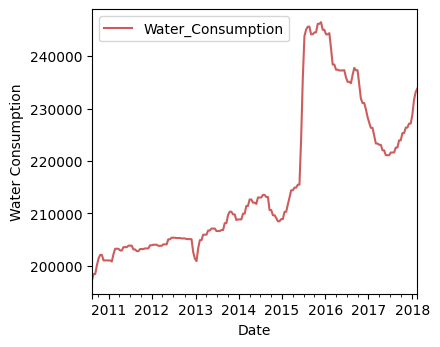

In [50]:
# prompt: plot all fratures against Date

import matplotlib.pyplot as plt

# Plotting all features against Date
plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')


plt.tight_layout()
plt.show()


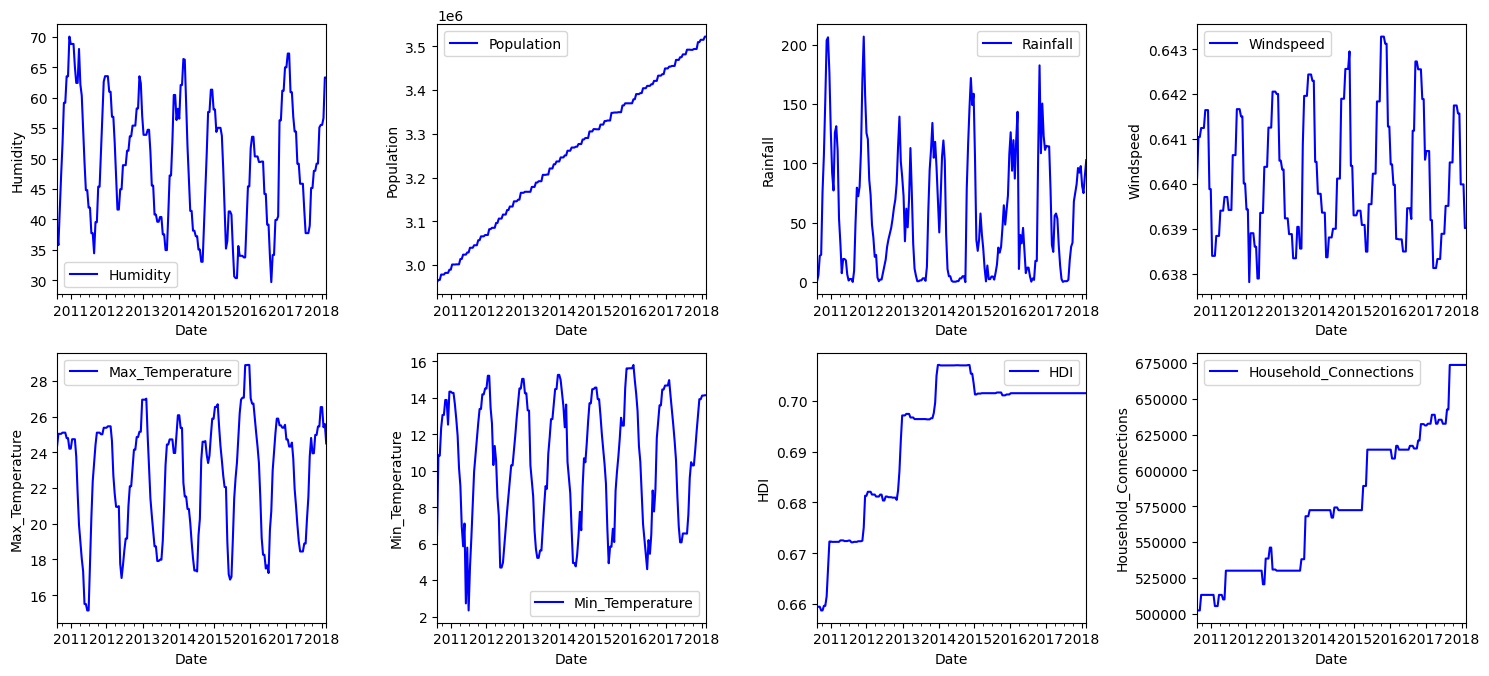

In [51]:
# Plotting all features against Date
plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 5)
df.plot('Date', 'Humidity', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Humidity')

ax = plt.subplot(3, 4, 6)
df.plot('Date', 'Population', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Population')

ax = plt.subplot(3, 4, 7)
df.plot('Date', 'Rainfall', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Rainfall')

ax = plt.subplot(3, 4, 8)
df.plot('Date', 'Windspeed', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Windspeed')

ax = plt.subplot(3, 4, 9)
df.plot('Date', 'Max_Temperature', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Max_Temperature')

ax = plt.subplot(3, 4, 10)
df.plot('Date', 'Min_Temperature', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Min_Temperature')

ax = plt.subplot(3, 4, 11)
df.plot('Date', 'HDI', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('HDI')

ax = plt.subplot(3, 4, 12)
df.plot('Date', 'Household_Connections', ax=ax, color='Blue')
plt.xlabel('Date')
plt.ylabel('Household_Connections')

plt.tight_layout()
plt.show()


### CAPTION HERE

**-Humidity Over Time:** Plot of humidity from 2011 to 2018, showing seasonal variations with peaks around the middle of each year.

**-Population Growth:** Population growth from 2011 to 2018.

**-Rainfall Patterns:** Rainfall trends from 2011 to 2018, illustrating notable fluctuations and high variability over time.

**-Windspeed Trends:** Windspeed from 2011 to 2018, showing slight seasonal variations with recurrent peaks each year.

**-Maximum Temperature Variation:** Plot of maximum temperature from 2011 to 2018, highlighting a periodic cycle with annual peaks and troughs.

**-Minimum Temperature Variation:** Plot of minimum temperature from 2011 to 2018, showing a similar cyclical pattern to maximum temperature.

**-HDI:** HDI from 2011 to 2018, showing a gradual increase.

**-Household Connections:** Growth of household connections from 2011 to 2018.

In [52]:
# use the method describe to see the statistical properties of the dataframe
df.describe()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
std,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396
min,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281


### COMMENT HERE

Plot a histogram of each feature separately. Comment on the distributions: e.g., which are bell shaped, which are multi-peaked, anything you think is notable

Text(0.5, 1.0, 'Histogram of Minimum Temperature')

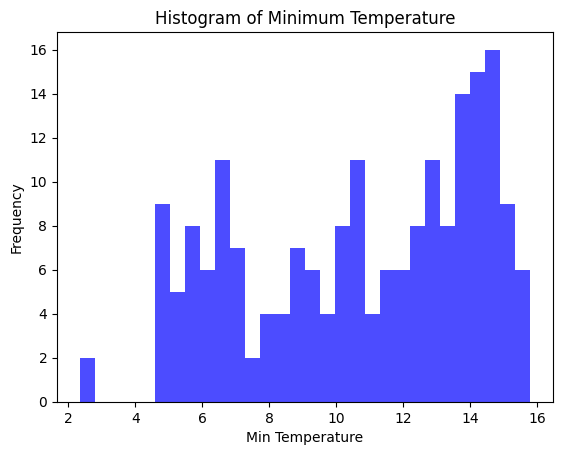

In [53]:
plt.hist(df['Min_Temperature'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Min Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum Temperature')

Temprature range from 2 to 16. The highest frequency occurs around the 14 to 16 , indicating that these temperatures are the most common in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

Text(0.5, 1.0, 'Histogram of Maximum Temperature')

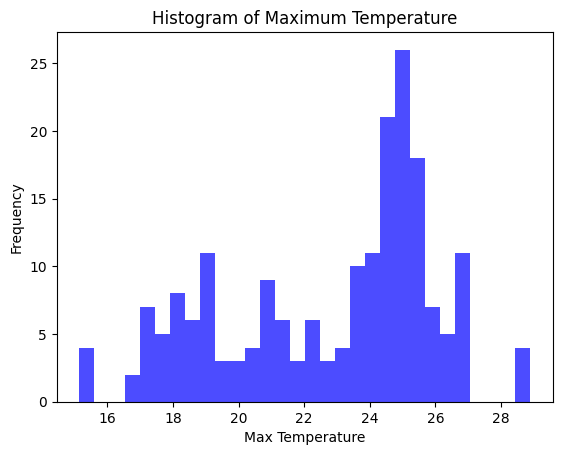

In [54]:
plt.hist(df['Max_Temperature'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Maximum Temperature')


Tempreture range from 15 to 30. The most common temperature range is around 24 and 25 indicating this temperature is the most frequently observed in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

Text(0.5, 1.0, 'Histogram of Humidity')

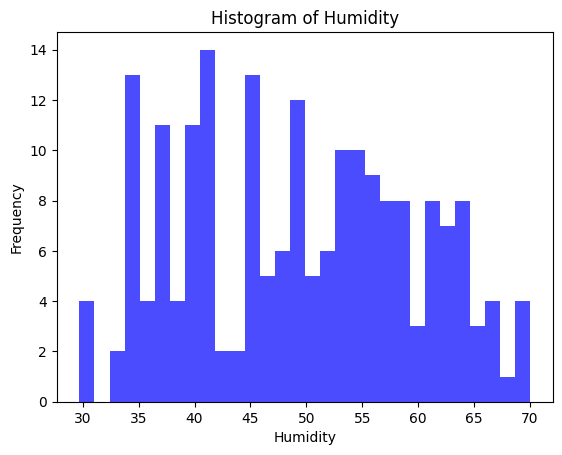

In [55]:
plt.hist(df['Humidity'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')


Distribution of humidity levels, ranging from 30 to 70. The highest frequency is observed between 35 and 42, indicating that these humidity are the most commonly recorded in the dataset. The distribution of this variable is nearly bell-shaped, showing a pattern that closely resembles a normal distribution, especially when compared to the other variables, which exhibit more pronounced deviations such as skewness or irregularities.

Text(0.5, 1.0, 'Histogram of Rainfall')

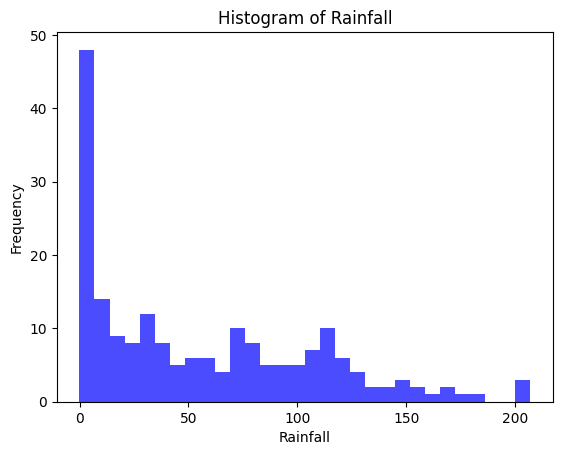

In [56]:
plt.hist(df['Rainfall'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Histogram of Rainfall')

Distribution of rainfall, ranging from 0 to 200. The highest frequency is 0, suggesting that no rainfall is the most frequent condition in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

Text(0.5, 1.0, 'Histogram of Population')

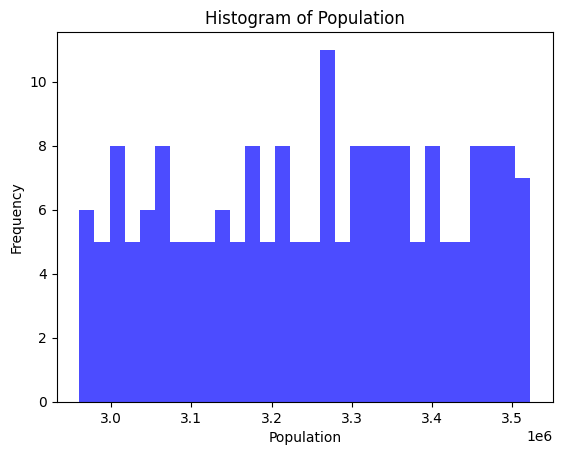

In [57]:
plt.hist(df['Population'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of Population')

Distribution of population, ranging from 2.9 to 3.6. The highest frequency between 3.2 and 3.3, indicating that this population range is the most common in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

Text(0.5, 1.0, 'Histogram of Windspeed')

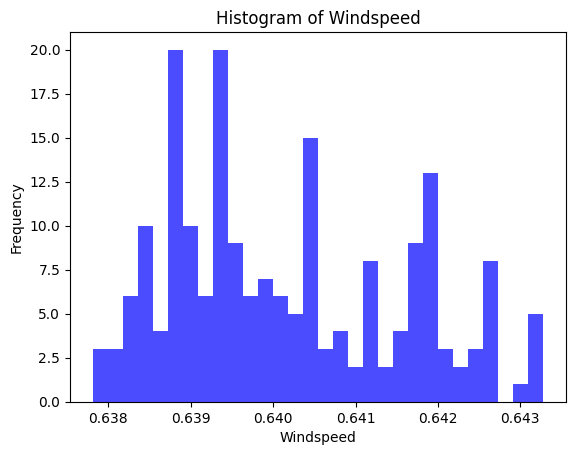

In [58]:
plt.hist(df['Windspeed'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Histogram of Windspeed')

Distribution of windspeed, ranging from 0.638 to 0.643. The highest frequency between 0.639 and 0.640, indicating that these windspeed are the most frequently recorded in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

Text(0.5, 1.0, 'Histogram of HDI')

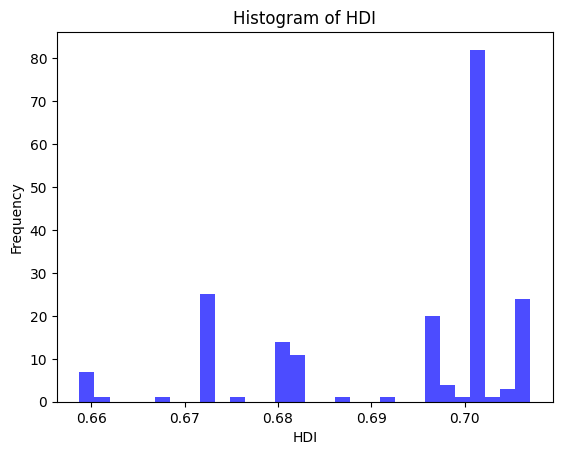

In [59]:
plt.hist(df['HDI'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('HDI')
plt.ylabel('Frequency')
plt.title('Histogram of HDI')

Distribution of HDI, ranging from 0.66 to 0.71. The highest frequency between 0.70 and 0.71, indicating that these HDI are the most common in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

Text(0.5, 1.0, 'Histogram of Household_Connections')

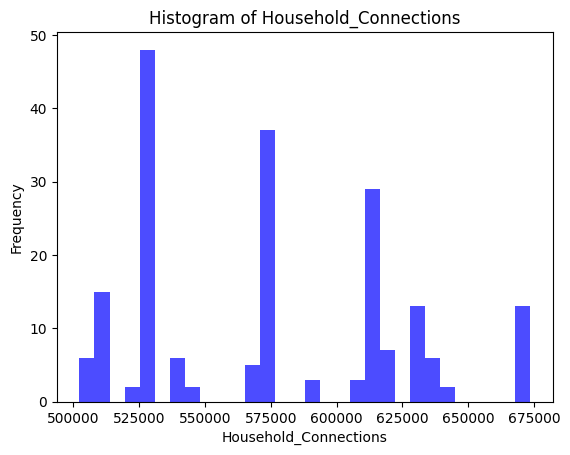

In [60]:
# Create a histogram on the subplot
plt.hist(df['Household_Connections'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Household_Connections')
plt.ylabel('Frequency')
plt.title('Histogram of Household_Connections')

Distribution of household connections, ranging from 500000 to 675000. The highest frequency is 525,000 connections, indicating that this value is the most common in the dataset. The distribution does not follow a bell-shaped or normal curve. Instead, it shows a different pattern, indicating skewness or irregularities.

# 3) Exploratory data analysis

Look at the correlation of the variables, pay attention to what is linearly correlatefd with the Water Consumption. If we had a single variable with high linear correlation with the target, we could try a univariate linear regression.

In [61]:
df.iloc[:,1:].corr()


,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000


This table presents the correlation coefficients between various variables, highlighting the relationships among Max Temperature, Min Temperature, HDI, Household Connections, Water Consumption, Humidity, Population, Rainfall, and Windspeed.

Notable correlations greater than 0.70 include:

Household Connections and Population (0.96)
Household Connections and Water Consumption (0.81)
HDI and Household Connections (0.71)
Rainfall and Humidity (0.72)
Min Temperature and Rainfall (0.76)

### CAPTION HERE:
QUESTION (answer here) - can you guess what the maximum result with can get with unvariate linear regression based on the correlation result and the model's R^2? _hint_ https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php#:~:text=What%20is%20the%20Coefficient%20of,0.6%20x%200.6%20%3D%200.36).

# 3) Linear Regression

## 3A) Univariate model

Start with a univariate linear regression, choose the variable with the highest coefficient. Choose whichever model you prefer.

In [62]:
# _your code here_
from sklearn.linear_model import LinearRegression
y = df['Water_Consumption'].values.reshape(-1, 1)
X = df['Household_Connections'].values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, y)

# make the prediction of the model based on the full input dataset (X)
prediction = model.predict(X)


Text(0, 0.5, 'Water Consumption')

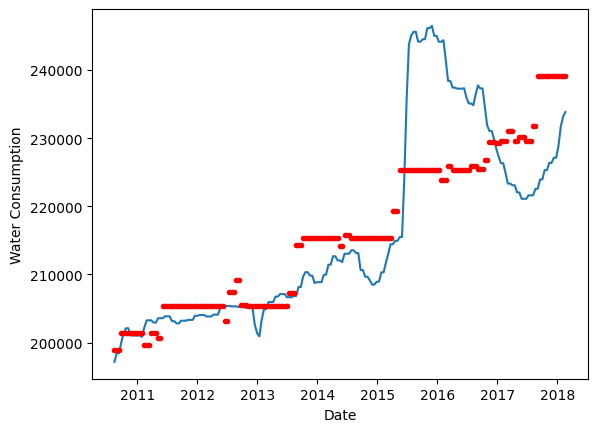

In [63]:

import pylab as plt
plt.plot(df['Date'], y)
plt.plot(df['Date'], prediction, 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')


Water consumption over time with predicted values (red), showing stepwise patterns, indicating a non-linear model.

#3B) multivariate model with statsmodels

One method for linear regression is the statsmodels Ordinary Least Square. I made the model below. Look at the P>|t| column of the report. NOTE: that represents the probability that "by chance" the variable would have that influence on the model, even if it did not explain the independent variable.

In [64]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Sun, 29 Sep 2024   Prob (F-statistic):           1.47e-49
Time:                        15:34:25   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

look at the R^2 above, and at the P>|t|, what do they represent?

Assiming a p-value of 0.05, report in a cell of text below _which variables are significant in the fit_:


The R^2 indicates how well a regression model fits the data. It represents the proportion of the variance in the dependent variable that is explained by the independent variables.

The P>|t| assess the significance of an independent variable in predicting the dependent variable



The variables that are significant are: Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption, Humidity,and Population.


# 3C) Now use sklearn like in class and lets do things right! training-test split!


### 3C - 1)
First select the numerical columns and store them in a list called numerical_features

In [65]:
# prompt: whiten the dataframe


# Select the numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features

['Max_Temperature',
 'Min_Temperature',
 'HDI',
 'Household_Connections',
 'Water_Consumption',
 'Humidity',
 'Population',
 'Rainfall',
 'Windspeed']

### 3C - 2) standardize the features

NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the **shape** of the distribution, it just translates it and shrinks it

Thankfully, sklearn offers a library of functions for preprocessing the data: standardize the features with sklearn StandardScaler. Like all sklearn functions, first create an object, then fit it to the data

In [66]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

StandardScaler()

to generate the scaled features transform the original feature set

In [67]:
scaled_features = scaler.transform(df[numerical_features])
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.80243935,
        -1.07137969, -0.03718638],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -1.77172968,
        -0.97229672,  0.63119909],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -1.77172968,
        -0.65827933,  0.63119909],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  1.6134208 ,
         0.36029122, -0.12687215],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  1.65830416,
         0.6399626 , -0.82569644],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  1.65830416,
         0.89472364, -0.82569644]])

Plot a histogram of each feature _after_ standardizing compare it to the plot above: is the shape the same? it sholud be identical! but the x-axis should be different

The histograms of the features after standardization are identical in shape, with only the X-axis scales adjusted.

In [68]:
df[numerical_features] = scaler.transform(df[numerical_features])

Text(0.5, 1.0, 'Histogram of Max_Temperature')

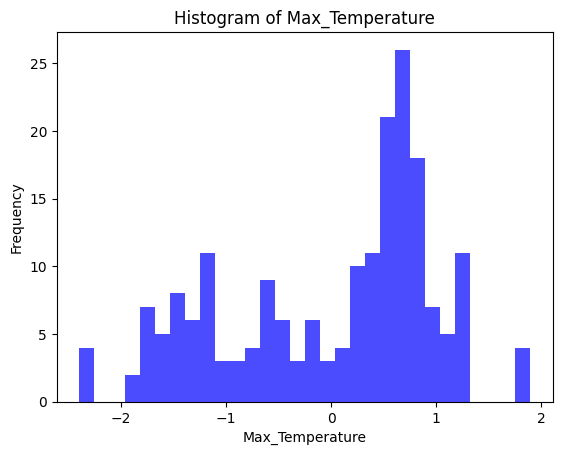

In [69]:
plt.hist(df['Max_Temperature'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Max_Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Max_Temperature')

Text(0.5, 1.0, 'Histogram of Min_Temperature')

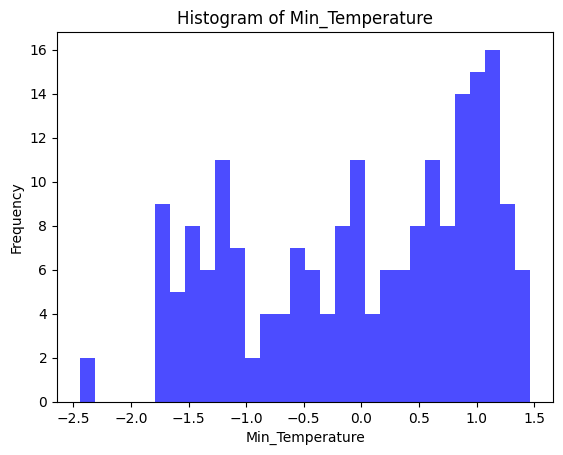

In [70]:
plt.hist(df['Min_Temperature'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Min_Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Min_Temperature')

Text(0.5, 1.0, 'Histogram of HDI')

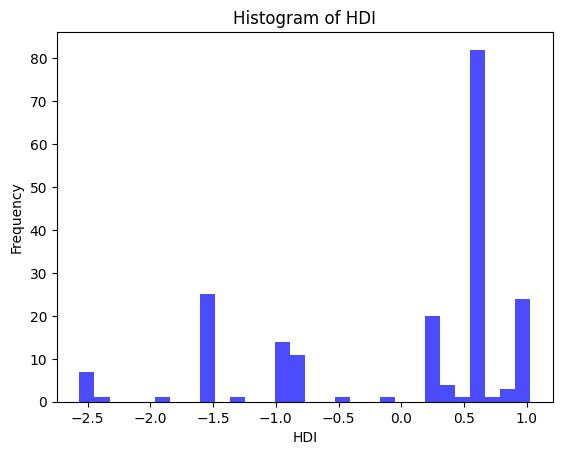

In [71]:
plt.hist(df['HDI'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('HDI')
plt.ylabel('Frequency')
plt.title('Histogram of HDI')

Text(0.5, 1.0, 'Histogram of Household_Connections')

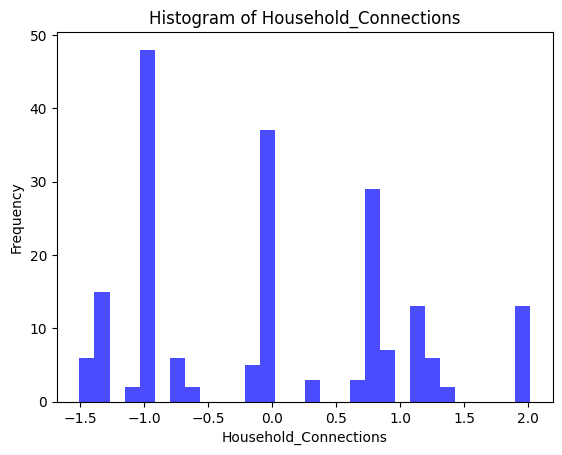

In [72]:
plt.hist(df['Household_Connections'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Household_Connections')
plt.ylabel('Frequency')
plt.title('Histogram of Household_Connections')

Text(0.5, 1.0, 'Histogram of Water_Consumption')

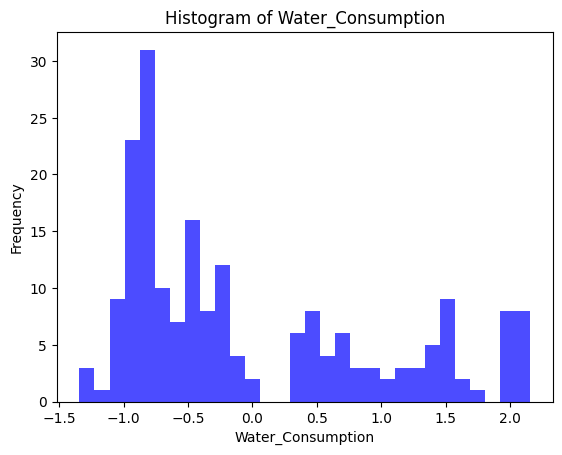

In [73]:
plt.hist(df['Water_Consumption'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Water_Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Water_Consumption')

Text(0.5, 1.0, 'Histogram of Humidity')

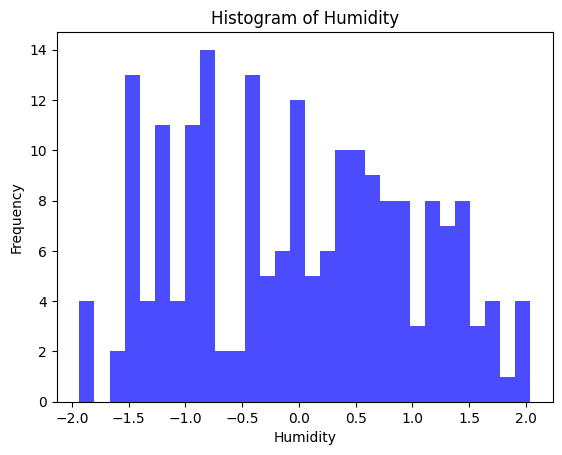

In [74]:
plt.hist(df['Humidity'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')

Text(0.5, 1.0, 'Histogram of Population')

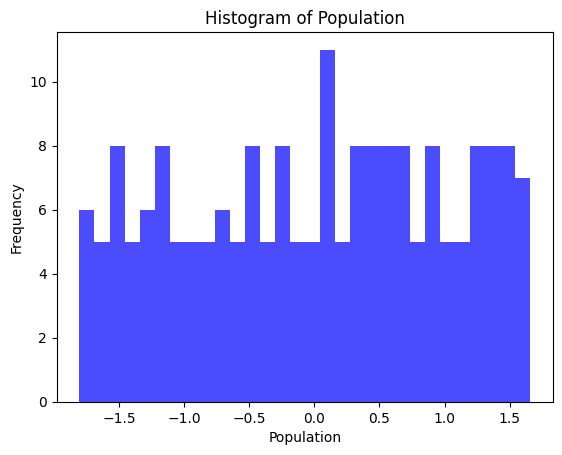

In [75]:
plt.hist(df['Population'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram of Population')

Text(0.5, 1.0, 'Histogram of Rainfall')

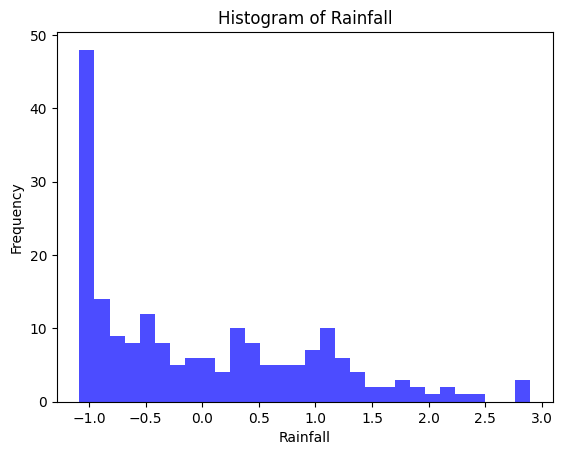

In [31]:
plt.hist(df['Rainfall'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.title('Histogram of Rainfall')

Text(0.5, 1.0, 'Histogram of Windspeed')

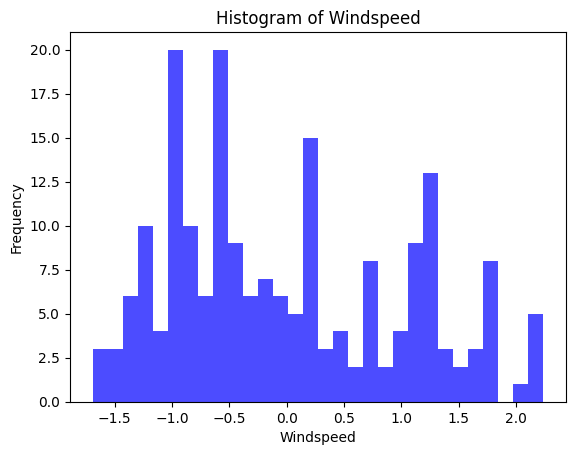

In [32]:
plt.hist(df['Windspeed'], bins=30, color='Blue', alpha=0.7)

# Add labels and title
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Histogram of Windspeed')

save the features in a new dataset

In [33]:
df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the whitened DataFrame
df_copy

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15 00:00:00,-6.970342,-3.485313,-238.394230,-11.847527,-15.329382,-4.978049,-20.034186,-1.105063,-486.575146
2010-08-29,2010-08-29 00:00:00,-6.902133,-3.116400,-238.394230,-11.847527,-15.329375,-4.996745,-20.034186,-1.103155,-6.439779
2010-09-12,2010-09-12 00:00:00,-6.902133,-3.118093,-238.394230,-11.847527,-15.329375,-4.939988,-20.034186,-1.097106,-6.439779
2010-09-26,2010-09-26 00:00:00,-6.902133,-2.990307,-242.419853,-11.847522,-15.329367,-4.884388,-20.034186,-1.096788,97.552673
2010-10-10,2010-10-10 00:00:00,-6.895644,-2.929801,-242.419853,-11.847522,-15.329361,-4.834883,-20.034186,-1.077141,97.552673
...,...,...,...,...,...,...,...,...,...,...
2017-12-24,2017-12-24 00:00:00,-6.756284,-2.856559,-5.802684,-11.847454,-15.329231,-4.804775,-20.034165,-1.069059,-551.001009
2018-01-07,2018-01-07 00:00:00,-6.756284,-2.840017,-5.802684,-11.847454,-15.329223,-4.804775,-20.034165,-1.075251,-551.001009
2018-01-21,2018-01-21 00:00:00,-6.866006,-2.840017,-5.802684,-11.847454,-15.329208,-4.794043,-20.034165,-1.077488,-551.001009
2018-02-04,2018-02-04 00:00:00,-6.848663,-2.838408,-5.802684,-11.847454,-15.329201,-4.728985,-20.034165,-1.072101,-1053.002123


look at the statistical properties of this new dataset with the method `describe`. Do they make sense?

After standardizing the features, all have new scales, resulting in changes to the mean, standard deviation, minimum, maximum, and other statistics in this table.

In [34]:
df_copy.describe()


,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,-7.117857,-3.124638,-51.577648,-11.847496,-15.329287,-4.865012,-20.034175,-1.084427,-459.862272
std,0.312706,0.291264,74.594111,0.000021,0.000071,0.098878,0.000006,0.019310,720.181185
min,-7.864431,-3.835195,-242.419853,-11.847527,-15.329382,-5.055854,-20.034186,-1.105326,-1675.113001
25%,-7.365447,-3.391245,-117.489982,-11.847515,-15.329347,-4.950630,-20.034180,-1.102518,-1053.002123
50%,-7.006513,-3.073948,-5.902380,-11.847497,-15.329316,-4.864222,-20.034175,-1.090135,-605.405070
75%,-6.895644,-2.856593,-5.802684,-11.847479,-15.329235,-4.790053,-20.034170,-1.069646,114.402514
max,-6.526744,-2.698080,24.968033,-11.847454,-15.329134,-4.663681,-20.034165,-1.028571,1148.540228


### 3C - 3) TRAIN-TEST SPLIT to avoid overfitting



In [35]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn
from sklearn.model_selection import train_test_split

# Select the features (independent variables)
vars = numerical_features
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


In [36]:
X1.head()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,-6.970342,-3.485313,-238.394230,-11.847527,-15.329382,-4.978049,-20.034186,-1.105063,-486.575146
2010-08-29,-6.902133,-3.116400,-238.394230,-11.847527,-15.329375,-4.996745,-20.034186,-1.103155,-6.439779
2010-09-12,-6.902133,-3.118093,-238.394230,-11.847527,-15.329375,-4.939988,-20.034186,-1.097106,-6.439779
2010-09-26,-6.902133,-2.990307,-242.419853,-11.847522,-15.329367,-4.884388,-20.034186,-1.096788,97.552673
2010-10-10,-6.895644,-2.929801,-242.419853,-11.847522,-15.329361,-4.834883,-20.034186,-1.077141,97.552673


### 3C -4) NOW FIT THE DATA WITH THE sklearn LinearRegression model

In [37]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model_multivariate = LinearRegression()
# Fit the model to the training data
model_multivariate.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model_multivariate.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model_multivariate.coef_)))
print("Intercept:", model_multivariate.intercept_)


Mean Squared Error: 0.0
R-squared: 1.0
Coefficients: [('Max_Temperature', -4.879162502668264e-17), ('Min_Temperature', -3.076597372356255e-17), ('HDI', 1.1696720309942238e-19), ('Household_Connections', -3.0749218735889556e-13), ('Water_Consumption', 1.000000000000096), ('Humidity', 4.0838916251738893e-16), ('Population', 9.859531886824825e-14), ('Rainfall', 9.842109779602787e-17), ('Windspeed', 2.172838033054293e-20)]
Intercept: -1.9539925233402755e-13


### 3C-5 Visualize the model

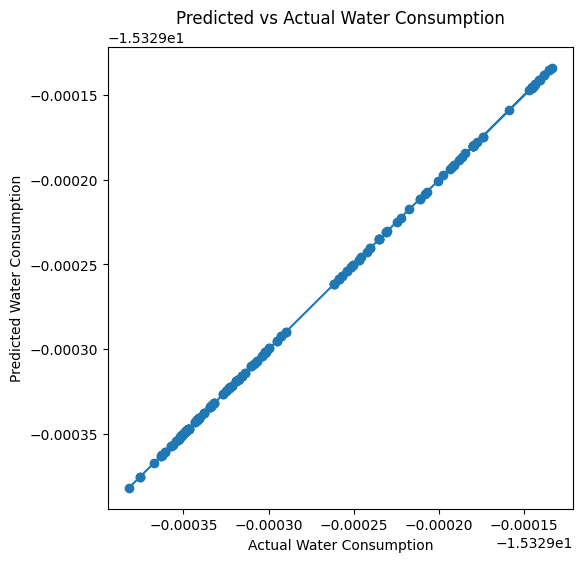

In [38]:
# prompt: plot predicted vs actual water_consumption based on sklearn model

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


CAPTION

The model appears to be overfitted as the predicted values perfectly align with the data.

Text(0, 0.5, 'Water Consumption')

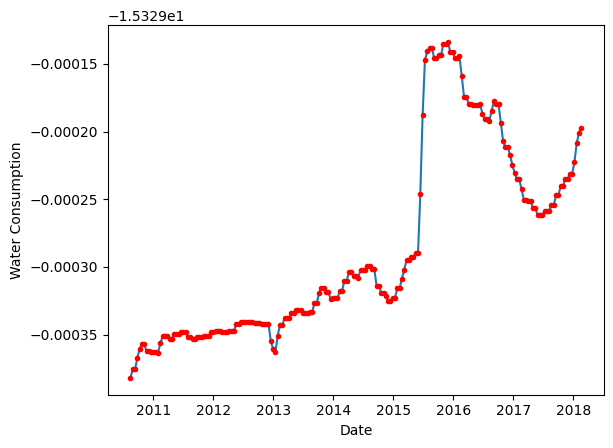

In [39]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

CAPTION

The model appears to be overfitted as the predicted values perfectly align with the data.

## 3D) SIMPLIFY THE MODEL
 You can simplify the model! this is what they did in  https://www.mdpi.com/2079-9276/8/3/156



### 3D - 1) Only use the columns that have a correlation higher than 0.5  $r>0.5$ with Water_consumption

In [40]:
df_copy.iloc[:,1:].corr() > 0.5

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,True,True,False,False,False,False,False,True,False
Min_Temperature,True,True,False,False,False,True,False,True,False
HDI,False,False,True,True,True,False,True,False,False
Household_Connections,False,False,True,True,True,False,True,False,False
Water_Consumption,False,False,True,True,True,False,True,False,False
Humidity,False,True,False,False,False,True,False,True,False
Population,False,False,True,True,True,False,True,False,False
Rainfall,True,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,False,True


In [41]:
vars2 = ['Max_Temperature', 'Min_Temperature', 'HDI', 'Household_Connections', 'Humidity', 'Population', 'Rainfall', 'Windspeed']
 #you can do this programmatically using the result of the code above, or just read out the variable corelation and typing the names of the variables in a list here

### 3D - 2) redo a multivariate fit with sklearn, just like above

In [42]:

X2 = df_copy[vars2]
#X2 = vars2.drop('Water_Consumption', axis=1)

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
model_multivariate2 = LinearRegression()

#Fit the model to the training data
model_multivariate2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = model_multivariate2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars2, model_multivariate2.coef_)))
print("Intercept:", model_multivariate2.intercept_)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficients: [('Max_Temperature', -6.640799179314288e-05), ('Min_Temperature', 0.0001244281798101231), ('HDI', -1.9248429969593462e-07), ('Household_Connections', 1.0657817519318775), ('Humidity', -0.00041286132456901114), ('Population', 7.186864687083474), ('Rainfall', 0.000766647346075183), ('Windspeed', -3.3790064924430537e-09)]
Intercept: 141.27919124615616
Mean Squared Error: 1.721375300831424e-09
R-squared: 0.6098046034206122


# 3D - 3) plot the model predictions, just like above

Text(0, 0.5, 'Water Consumption')

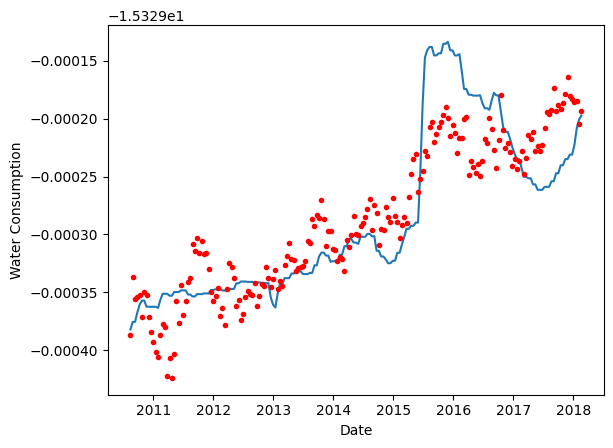

In [43]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate2.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

### CAPTION

This model, which incorporates features with a correlation greater than 0.5, significantly outperforms the previous model. Additionally, it demonstrates no signs of overfitting

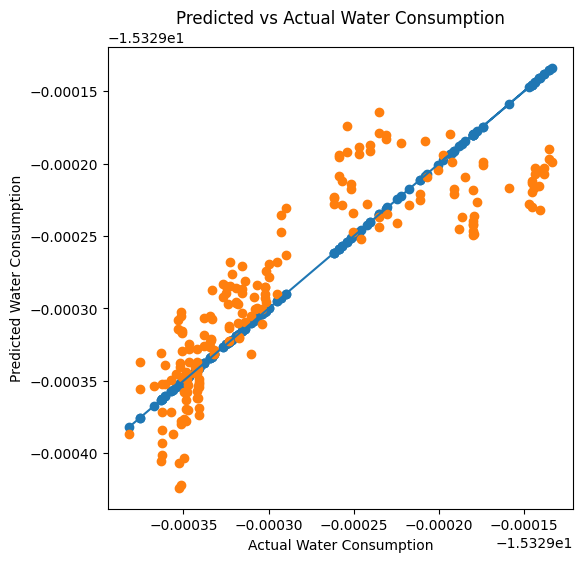

In [44]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.scatter(y, model_multivariate2.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


# CAPTION

which model is better?

In this plot, we compare two models. The first model, represented by the blue dots, shows a significant overfitting issue, as the prediction line closely follows all the data points but fails to generalize well. In contrast, the second model, indicated by the orange dots, performs much better, with a prediction line that accurately captures the majority of the data without overfitting. This demonstrates a logical distance between the prediction line and the actual data, indicating a more robust and generalizable model.